<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
496,5,110,68,0,0,26.0,0.292,30,0
553,1,88,62,24,44,29.9,0.422,23,0
641,4,128,70,0,0,34.3,0.303,24,0


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Save X and y data
X = df.drop(columns = 'Outcome')
y = df['Outcome']
#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


Text(0.5, 0.08, 'Explaining Diabetes ')

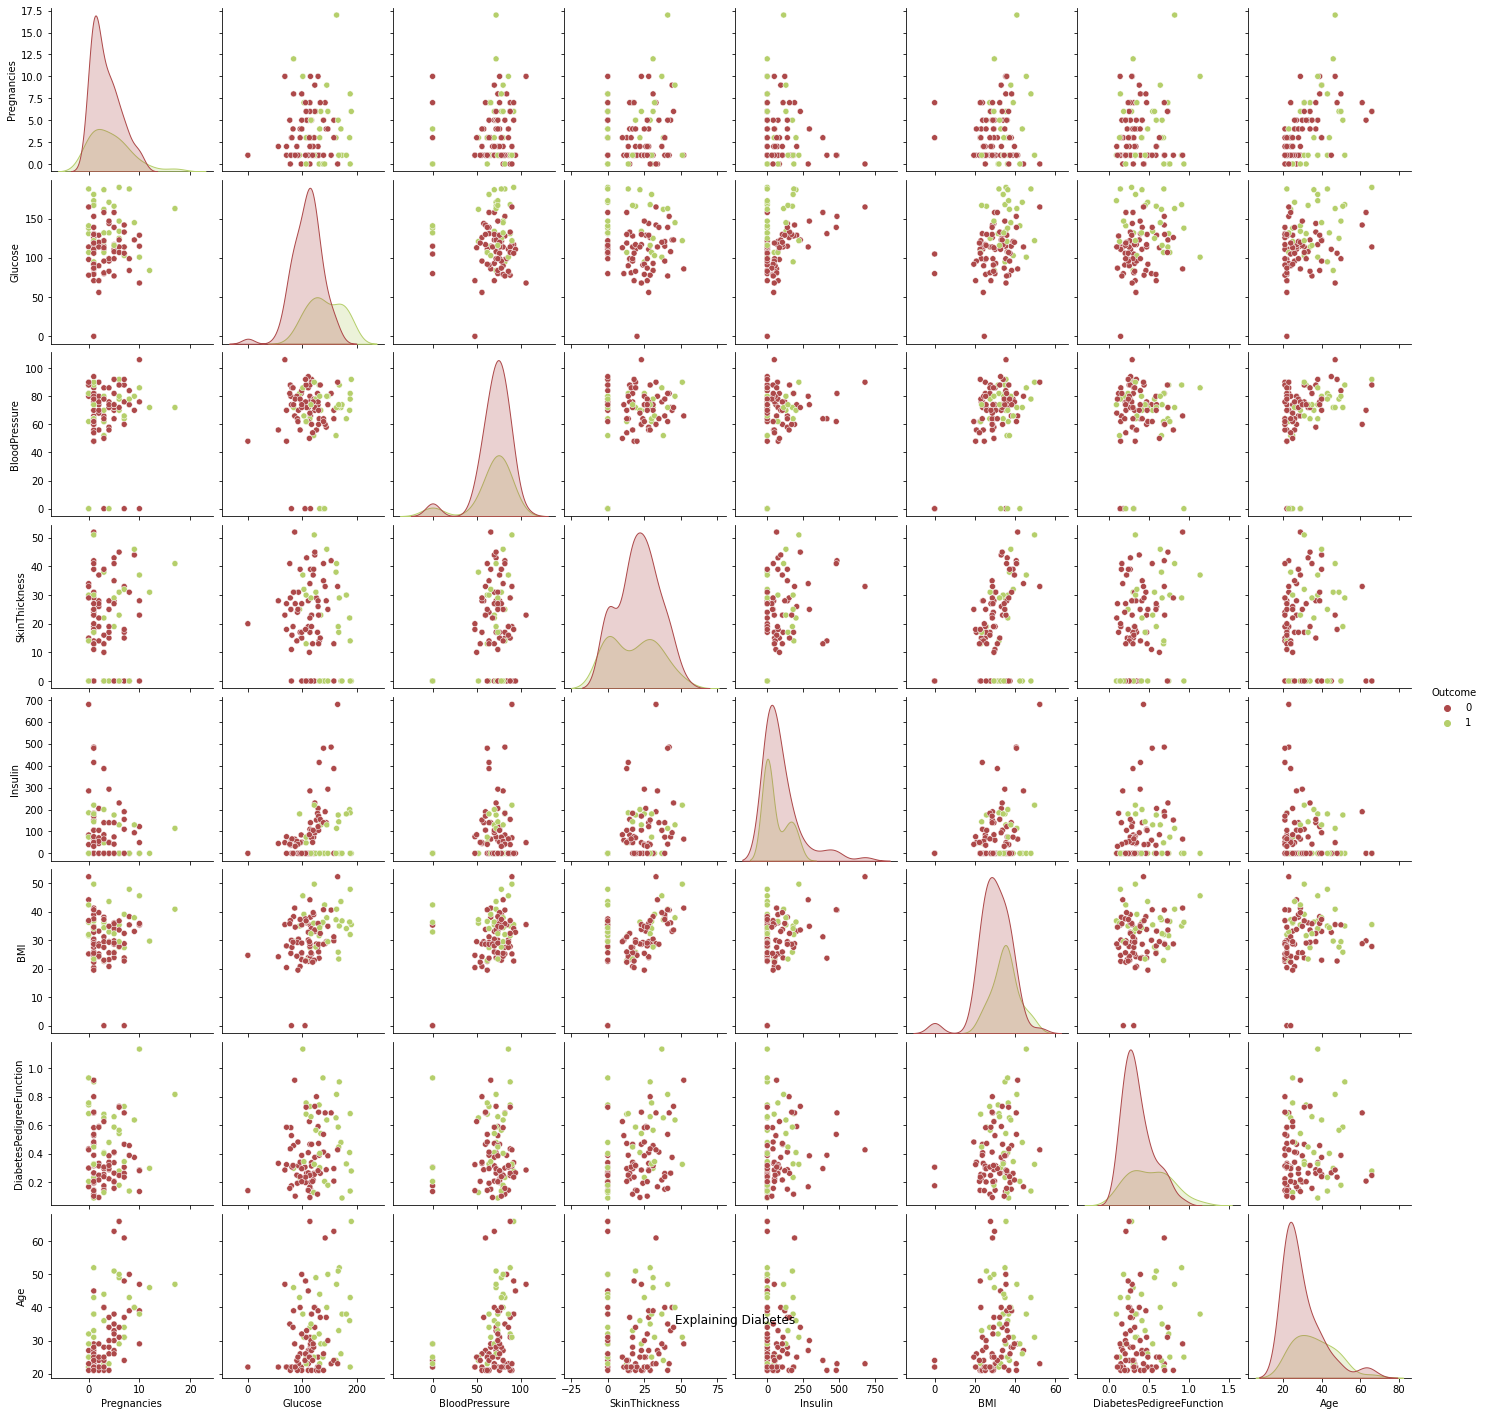

In [5]:
p=sns.pairplot(data=df.sample(100),hue='Outcome',palette='tab20b_r')
p.fig.suptitle("Explaining Diabetes ",y=0.08)

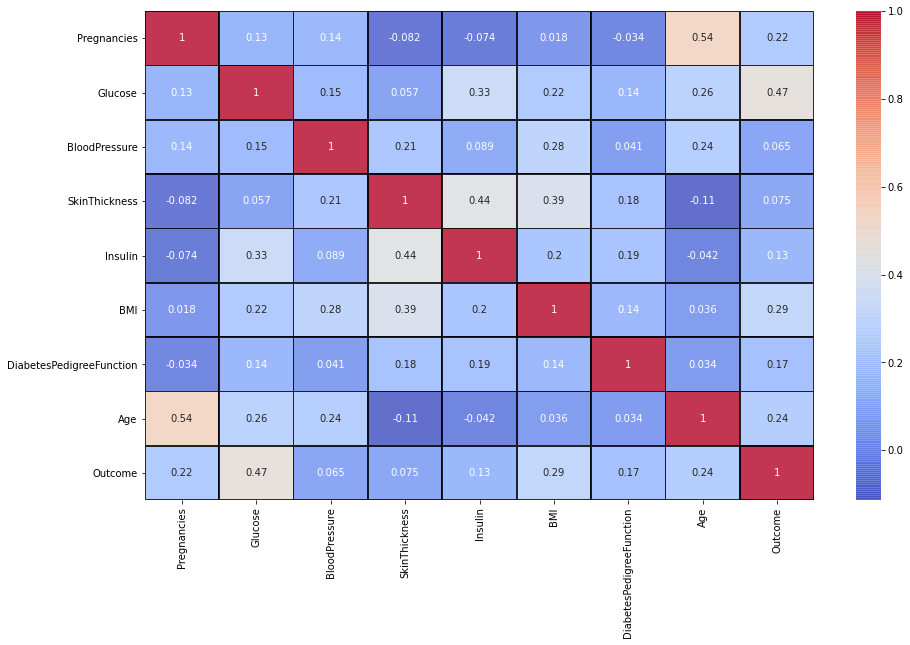

In [11]:
plt.figure(figsize=(15,9)),

i=sns.heatmap(df.corr(), annot=True, cmap='coolwarm', alpha= 0.8,linewidths=0.8, linecolor='black')


In [ ]:
# relationship between education and age 
plt.figure(figsize=(14,9))
sns.scatterplot( x = 'Age' , y = Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'' , hue = 'target' , data = training).set(title = 'Relationship between Age and Education With Respect to Target (Income)');


### Determine  baseline model :


In [7]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [8]:
pca=PCA()


### Scale Data

In [79]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

### Create Logistic Regression Model

In [61]:
clf=LogisticRegression(random_state=0)
clf.fit(scaled_x_train,y_train)

LogisticRegression(random_state=0)

### Evaluate Model

In [62]:
# Accuracy
clf.score(X_train,y_train)

0.3263888888888889

In [63]:
clf.score(X_test,y_test)

0.4166666666666667

In [64]:
# Instantiate PCA
pca = PCA()

# Fit & transform data
PCA_x_train = pca.fit_transform(scaled_x_train)
PCA_x_test = pca.transform(scaled_x_test)

In [65]:
pd.Series(pca.explained_variance_ratio_) 

0    0.261243
1    0.224876
2    0.129441
3    0.109941
4    0.093459
5    0.085928
6    0.049548
7    0.045564
dtype: float64

### Create a Scree Plot


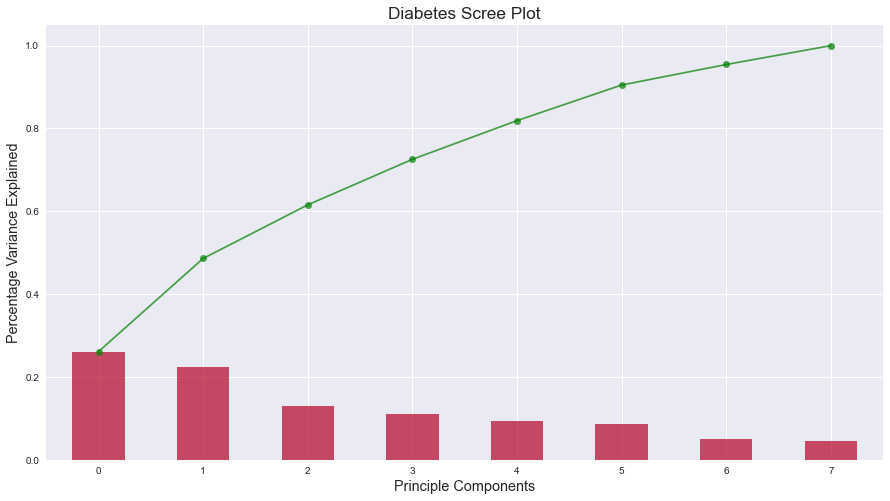

In [66]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7,cmap='coolwarm_r') # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'green' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

### Use Your Principal Components for a Logistic Regression Model


In [67]:
# Instantiate Standard Scaler
pca = PCA()

# Fit & transform data
lg=LogisticRegression()
lg.fit(PCA_x_train,y_train)

LogisticRegression()

### Evaluate Model

In [68]:
#Accuracy
lg.score(PCA_x_train, y_train)

0.7951388888888888

In [69]:
lg.score(PCA_x_test, y_test)

0.734375